In [1]:
import rebound
import reboundx
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [23]:
try:
    sim = rebound.Simulation.from_file("solarsystem.bin")
    rebx = reboundx.Extras.from_file(sim, "solarsystemrebx.bin")
    sim.collision = "direct"
    
except:
    sim = rebound.Simulation()
    date = "2017-04-15 12:00"
    sim.add("Sun", date=date)
    sim.add("Mercury", date=date)
    sim.add("Venus", date=date)
    sim.add("Earth", date=date)
    sim.add("Mars", date=date)
    sim.add("Jupiter", date=date)
    sim.add("Saturn", date=date)
    sim.add("Uranus", date=date)
    sim.add("Neptune", date=date)
    sim.move_to_com()
    
    ps = sim.particles
    ps[0].r = 0.00465
    for p in ps[1:]:
        p.r = p.a*(p.m/3./ps[0].m)**(1./3.) # set to hill radius
        
    sim.integrator="whfast"
    sim.dt = sim.particles[1].P*np.sqrt(21)/100 # choose irrational number ~5%
    rebx = reboundx.Extras(sim)
    gr = rebx.add("gr_potential")
    gr.params["c"] = 10058.24
    sim.collision = "direct"
    
    sim.save("solarsystem.bin")
    rebx.save("solarsystemrebx.bin")

Searching NASA Horizons for 'Sun'... Found: Sun (10).
Searching NASA Horizons for 'Mercury'... Found: Mercury Barycenter (199).
Searching NASA Horizons for 'Venus'... Found: Venus Barycenter (299).
Searching NASA Horizons for 'Earth'... Found: Earth-Moon Barycenter (3).
Searching NASA Horizons for 'Mars'... Found: Mars Barycenter (4).
Searching NASA Horizons for 'Jupiter'... Found: Jupiter Barycenter (5).
Searching NASA Horizons for 'Saturn'... Found: Saturn Barycenter (6).
Searching NASA Horizons for 'Uranus'... Found: Uranus Barycenter (7).
Searching NASA Horizons for 'Neptune'... Found: Neptune Barycenter (8).


In [58]:
ps = sim.particles
efac = 3
esim = rebound.Simulation()
esim.add(m=ps[0].m, x=ps[0].x, y=ps[0].y, z=ps[0].z, vx=ps[0].vx, vy=ps[0].vy, vz=ps[0].vz, r=ps[0].r)
for p in ps[1:]:
    esim.add(m=p.m, a=p.a, e=p.e*efac, inc=p.inc, Omega=p.Omega, pomega=p.pomega, f=p.f, r=p.r)
esim.move_to_com()

esim.integrator="whfast"
esim.dt = esim.particles[1].P*np.sqrt(21)/100 # choose irrational number ~5%
rebx = reboundx.Extras(esim)
gr = rebx.add("gr_potential")
gr.params["c"] = 10058.24
esim.collision = "direct"

In [59]:
%%time
yr = 2*np.pi # one year is 2pi in these units
esim.integrate(1.e6*yr) # integrate for a million years

Collision: Two particles collided (d < r1+r2)

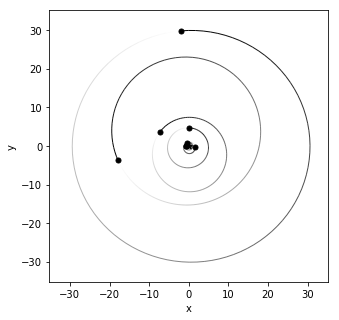

In [60]:
fig = rebound.OrbitPlot(esim)

In [61]:
esim.particles[1].e

0.839159943659376

In [62]:
sim.particles[1].e

0.20562539033062593

In [64]:
esim.t/yr

787480.8586856998